## Graph Visual 1: Which regions are affected the most by the zombie outbreak?

In [25]:
#Graph Visual 1: Which regions are affected the most by the zombie outbreak?

# Dependencies
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Set the base directory, directory pathing aid by Xpert Learning Assistant
base_dir = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))  # Navigate up two levels to the main project directory

# Search for the CSV file in Stephen's folder
csv_path = os.path.join(base_dir, 'Stephen', 'johns_hopkins_github_data_pull', 'covid_reports_2021-23_us', '01-01-2023.csv')

# Read 01-01-2023 CSV file into a DataFrame
df = pd.read_csv(csv_path)

# Dropping unneeded columns for this graph
columns_to_drop = df.columns[1:5].tolist() + df.columns[7:20].tolist()
trimmed_df = df.drop(columns=columns_to_drop)
trimmed_df.head()

,Province_State,Confirmed,Deaths
0,Alabama,1568934,20737
1,Alaska,301432,1455
2,American Samoa,8266,34
3,Arizona,2378334,32182
4,Arkansas,985747,12695


In [26]:
# Sort to the top 10 states of infected cases
sorted_df = trimmed_df.sort_values(by=['Confirmed'], ascending=False)
sorted_df['Confirmed'] = sorted_df['Confirmed'].astype(int)
sorted_df.head(10)

,Province_State,Confirmed,Deaths
5,California,11835450,98544
49,Texas,8211474,91594
11,Florida,7338503,83906
36,New York,6576267,75139
17,Illinois,3969832,40678
43,Pennsylvania,3416142,48892
37,North Carolina,3316814,27629
40,Ohio,3307568,41257
26,Michigan,2988654,40767
12,Georgia,2985193,41417


In [27]:
sorted_df.dtypes

Province_State    object
Confirmed          int32
Deaths             int64
dtype: object

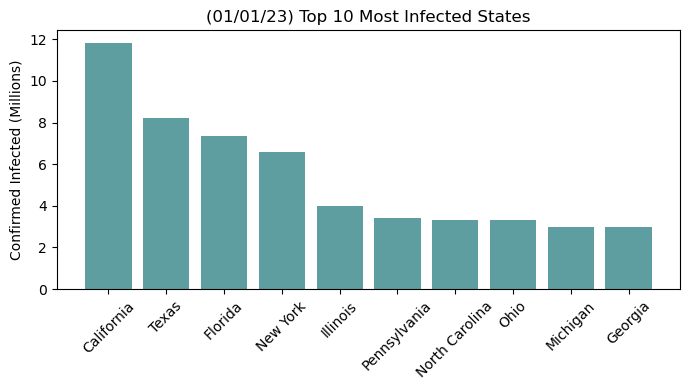

In [28]:
# Convert the 'Confirmed' values to millions and create the 'Confirmed_millions' column
sorted_df['Confirmed_millions'] = sorted_df['Confirmed'] / 1000000

# Plotting
plt.figure(figsize=(7, 4))
plt.bar(sorted_df.head(10)['Province_State'], sorted_df.head(10)['Confirmed_millions'], 
        color='cadetblue', align="center")
plt.title("(01/01/23) Top 10 Most Infected States")
plt.ylabel("Confirmed Infected (Millions)")
plt.xticks(rotation=45)

# Set the y-tick labels to show values in millions
plt.yticks(range(0, int(sorted_df['Confirmed_millions'].max()) + 2, 2))

plt.tight_layout()

# Save graph as a png file to the desired directory
output_dir = "Images"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

plt.savefig(os.path.join(output_dir, 'Top_10_Most_Infected_States.png'))

plt.show()

## Graph Visual 2: Are there any signs shown that the country is able to control the outbreak by the end of the year?

In [29]:
#Graph Visual 2: Are there any signs shown in the data that the country is able 
# to control the outbreak by the end of the year?

# Set the base directory, directory pathing aid by Xpert Learning Assistant
base_dir = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))  # Navigate up two levels to the main project directory

# Search for the CSV file in Stephen's folder
start_csv_path = os.path.join(base_dir, 'Stephen', 'johns_hopkins_github_data_pull', 'covid_reports_2020', '04-01-2020.csv')
mid_csv_path = os.path.join(base_dir, 'Stephen', 'johns_hopkins_github_data_pull', 'covid_reports_2021-23_us', '09-01-2021.csv')
end_csv_path = os.path.join(base_dir, 'Stephen', 'johns_hopkins_github_data_pull', 'covid_reports_2021-23_us', '03-01-2023.csv')

# Read both CSVs into separate DataFrames
start_df = pd.read_csv(start_csv_path)
mid_df = pd.read_csv(mid_csv_path)
end_df = pd.read_csv(end_csv_path)

# Dropping unneeded columns for the graph
# 04-01-2020
start_columns_to_drop = start_df.columns[0:2].tolist() + start_df.columns[3:7].tolist() + start_df.columns[9:18].tolist()
start_trimmed_df = start_df.drop(columns=start_columns_to_drop)

start_trimmed_df.head()

,Province_State,Confirmed,Deaths
0,South Carolina,4,0
1,Louisiana,47,1
2,Virginia,7,0
3,Idaho,195,3
4,Iowa,1,0


In [30]:
#09-01-2021
mid_columns_to_drop = mid_df.columns[1:5].tolist() + mid_df.columns[7:21].tolist()
mid_trimmed_df = mid_df.drop(columns=mid_columns_to_drop)
mid_trimmed_df.head()

,Province_State,Confirmed,Deaths
0,Alabama,704420,12291
1,Alaska,89345,448
2,American Samoa,0,0
3,Arizona,1016663,18853
4,Arkansas,455781,6969


In [31]:
# 03-01-2023
end_columns_to_drop = end_df.columns[1:5].tolist() + end_df.columns[7:18].tolist()
end_trimmed_df = end_df.drop(columns=end_columns_to_drop)
end_trimmed_df.head()

,Province_State,Confirmed,Deaths
0,Alabama,1642062,21001
1,Alaska,307073,1486
2,American Samoa,8320,34
3,Arizona,2440294,33076
4,Arkansas,1004752,12980


In [32]:
# Group by 'Province_State' and sum the 'Confirmed' values
merged_start_df = start_trimmed_df.groupby('Province_State').sum().reset_index()

# Sort the merged DataFrame by 'Confirmed' values in descending order
sorted_merged_df = merged_start_df.sort_values(by='Confirmed', ascending=False)

us_states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
             'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
             'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey',
             'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
             'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia',
             'Wisconsin', 'Wyoming']

# Filter the DataFrame to keep only US states
start_us_states_df = sorted_merged_df[sorted_merged_df['Province_State'].isin(us_states)]

# Display the DataFrame with only US states
start_us_states_df.head(5)


,Province_State,Confirmed,Deaths
89,New York,83948,1923
86,New Jersey,22255,355
74,Michigan,9315,335
13,California,9262,199
71,Massachusetts,7738,122


In [33]:
# Group by 'Province_State' and sum the 'Confirmed' values
merged_mid_df = mid_trimmed_df.groupby('Province_State').sum().reset_index()

# Sort the merged DataFrame by 'Confirmed' values in descending order
sorted_merged_df = merged_mid_df.sort_values(by='Confirmed', ascending=False)

us_states = ['California', 'Massachusetts', 'Michigan', 'New Jersey', 'New York']   #top 5 states with the highest INITIAL confirmed cases

# Filter the DataFrame to keep only US states
mid_us_states_df = sorted_merged_df[sorted_merged_df['Province_State'].isin(us_states)]

# Display the DataFrame with only US states
mid_us_states_df.head(5)


,Province_State,Confirmed,Deaths
5,California,4479579,65683
36,New York,2282836,54282
34,New Jersey,1094249,26902
26,Michigan,1065671,21616
25,Massachusetts,761906,14787


In [34]:
# Group by 'Province_State' and sum the 'Confirmed' values
merged_start_df = end_trimmed_df.groupby('Province_State').sum().reset_index()

# Sort the merged DataFrame by 'Confirmed' values in descending order
sorted_merged_df = merged_start_df.sort_values(by='Confirmed', ascending=False)

us_states = ['California', 'Massachusetts', 'Michigan', 'New Jersey', 'New York']

# Filter the DataFrame to keep only US states
end_us_states_df = sorted_merged_df[sorted_merged_df['Province_State'].isin(us_states)]

# Display the DataFrame with only US states
end_us_states_df.head(10)

,Province_State,Confirmed,Deaths
5,California,12097613,100747
36,New York,6782812,77043
26,Michigan,3057222,42096
34,New Jersey,3043089,35982
25,Massachusetts,2216870,24131


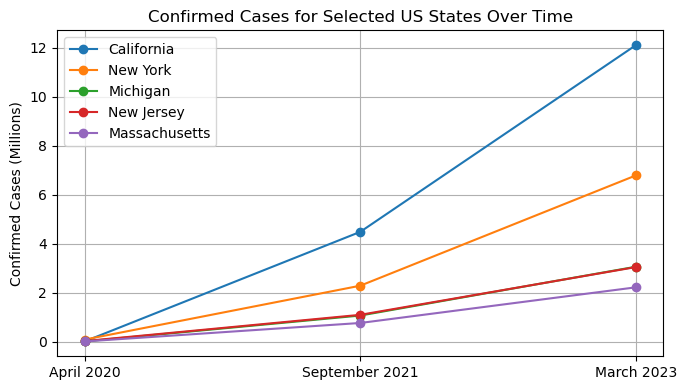

In [35]:
# Concatenate the three DataFrames
combined_df = pd.concat([start_us_states_df, mid_us_states_df, end_us_states_df])

# Filter the DataFrame to include only the five US states
states_of_interest = ['California', 'New York', 'Michigan', 'New Jersey', 'Massachusetts']
filtered_df = combined_df[combined_df['Province_State'].isin(states_of_interest)]

# Create the line graph with markers
plt.figure(figsize=(7, 4))
for state in states_of_interest:
    state_data = filtered_df[filtered_df['Province_State'] == state]
    plt.plot(['April 2020', 'September 2021', 'March 2023'], state_data['Confirmed'] / 1000000, marker='o', label=state)

plt.ylabel('Confirmed Cases (Millions)')
plt.title('Confirmed Cases for Selected US States Over Time')
plt.legend()
plt.grid(True)

# Set the y-tick labels to show values in millions
plt.yticks(range(0, int(filtered_df['Confirmed'].max() / 1000000) + 2, 2))

plt.tight_layout()

# Save graph as a png file to the desired directory
output_dir = "Images"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

plt.savefig(os.path.join(output_dir, 'Confirmed_Cases_Selected_US_States_Over_Time.png'))

plt.show()

### Graph Visual 3:

In [36]:
##Graph Visual 3: Will any of the states be able to accommodate the number of infected in the hospitals available?

# Set the base directory, directory pathing aid by Xpert Learning Assistant
base_dir = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))  # Navigate up two levels to the main project directory

# Search for the CSV file in Stephen and Vivian's folder
hospitals_csv_path = os.path.join(base_dir, 'Vivian', 'Resources', 'cleaned_hospitals.csv')

infected_csv_path = os.path.join(base_dir, 'Stephen', 'johns_hopkins_github_data_pull', 'covid_reports_2021-23_us', '03-01-2023.csv')

# Read both CSVs into separate DataFrames
infected_df = pd.read_csv(infected_csv_path)
hospitals_df = pd.read_csv(hospitals_csv_path)


In [37]:
# Confirmed cases
infected_columns_to_drop = infected_df.columns[1:5].tolist() + infected_df.columns[6:18].tolist()
infected_trimmed_df = infected_df.drop(columns=infected_columns_to_drop)
infected_trimmed_df = infected_trimmed_df.rename(columns={'Province_State': 'State'})
infected_trimmed_df.head()

,State,Confirmed
0,Alabama,1642062
1,Alaska,307073
2,American Samoa,8320
3,Arizona,2440294
4,Arkansas,1004752


In [38]:
# Hospital numbers
hospitals_columns_to_drop = hospitals_df.columns[0:1].tolist() + hospitals_df.columns[2:5].tolist() + hospitals_df.columns[7:9].tolist()
hospitals_trimmed_df = hospitals_df.drop(columns=hospitals_columns_to_drop)
hospitals_trimmed_df

,Name,State,Status,Beds,Trauma,Helipad
0,Los Robles Hospital & Medical Center - East Ca...,California,Open,62,Not Available,N
1,East Los Angeles Doctors Hospital,California,Open,127,Not Available,N
2,Southern California Hospital At Hollywood,California,Open,100,Not Available,N
3,Kindred Hospital Baldwin Park,California,Open,95,Not Available,N
4,Lakewood Regional Medical Center,California,Open,172,Not Available,N
...,...,...,...,...,...,...
6964,Cohen Children’S Medical Center,New York,Open,202,Level I Pediatric,N
6965,North Ms Medical Center - Eupora,Mississippi,Open,38,Level Iv,Y
6966,North Ms Medical Center - Iuka,Mississippi,Open,48,Level Iv,Y
6967,Adventist Healthcare White Oak Medical Center,Maryland,Open,178,Not Available,N


In [39]:
# Define a custom function to count occurrences of "Not Available"
def count_not_available(x):
    return (x != 'Not Available').sum()

# Group by State and aggregate the sum of Beds, Trauma, and Y of Helipads
state_summary = hospitals_trimmed_df.groupby('State').agg({
    'Beds': 'sum',
    'Trauma': count_not_available,
    'Helipad': lambda x: (x == 'Y').sum()
}).reset_index()

# Create a DataFrame with US states and their abbreviations
us_states = pd.DataFrame({
    'State': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
             'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
             'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey',
             'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
             'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia',
             'Wisconsin', 'Wyoming']
})

# Merge the state_summary with us_states on the State column
merged_hospital_df = pd.merge(state_summary, us_states, on='State', how='right')

merged_hospital_df.head()    

,State,Beds,Trauma,Helipad
0,Alabama,18902,60,90
1,Alaska,2061,21,13
2,Arizona,15578,44,73
3,Arkansas,13013,58,90
4,California,104332,71,188


In [40]:
#Put the DataFrames together
merged_df = infected_trimmed_df.merge(merged_hospital_df, left_on='State', right_on='State', how='inner')

# Want to move 'Confirmed' to the far right, grabbing the index of the "Confirmed" column
confirmed_index = merged_df.columns.get_loc('Confirmed')

# then move the column to the far-right
merged_df.insert(len(merged_df.columns)-1, 'Confirmed', merged_df.pop('Confirmed'))

# Sort by 'Beds'
sort_merged_df = merged_df.sort_values(by='Confirmed', ascending=False)

sort_merged_df.head() #CA with the most infected, how can that compare to the total hospital beds in America

,State,Beds,Trauma,Helipad,Confirmed
4,California,104332,71,188,12097613
42,Texas,91349,296,426,8453435
8,Florida,73078,37,192,7516906
31,New York,60368,46,73,6782812
12,Illinois,36928,57,149,4072972


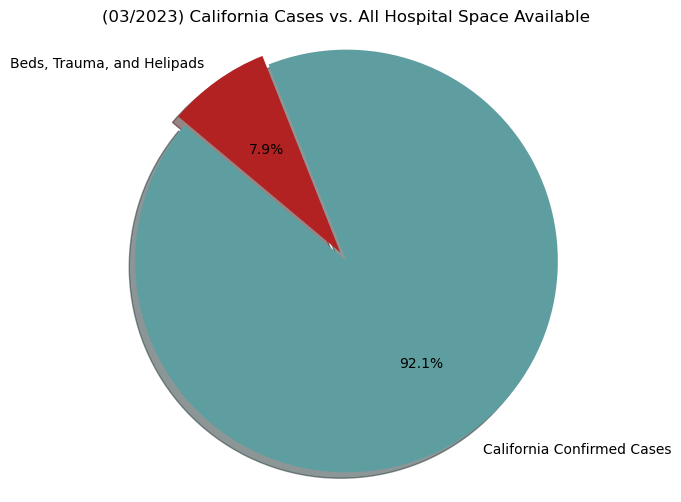

In [43]:
# Extract data for California
california_data = sort_merged_df[sort_merged_df['State'] == 'California']
california_confirmed = california_data['Confirmed'].values[0]

# Calculate the sum of Beds, Trauma, and Helipad for all US states
us_states_sum = sort_merged_df[['Beds', 'Trauma', 'Helipad']].sum().sum()

# Create labels for the pie chart
labels = ['California Confirmed Cases', 'Beds, Trauma, and Helipads']
sizes = [california_confirmed, us_states_sum]
explode = (0.05,0)
colors = ['cadetblue', 'firebrick']

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, explode=explode, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')

plt.title('(03/2023) California Cases vs. All Hospital Space Available')
plt.savefig(os.path.join(output_dir, '2023-03 California Cases vs. All Hospital Space Available.png'), bbox_inches='tight', pad_inches=0.1)
plt.show()